In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
import os
import glob
import pandas as pd
os.chdir("/content/gdrive/MyDrive/book recom/updated_books")

In [27]:
extension = 'json'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [12]:
test_df = pd.read_json(all_filenames[0])

In [13]:
test_df

,books
0,"{'isbn': '0804108005', 'title': 'Nurses: The H..."
1,"{'isbn': '0915920824', 'title': 'Buried Treasu..."
2,"{'isbn': '8479792485', 'title': 'El Escepticis..."
3,"{'isbn': '0806511540', 'title': 'Instant Yiddi..."
4,"{'isbn': '0446326593', 'title': 'Lesbian Nuns'..."
...,...
4975,"{'isbn': '0192837788', 'title': 'Around the Wo..."
4976,"{'isbn': '3257204841', 'title': 'Venedig kann ..."
4977,"{'isbn': '0764221159', 'title': 'The Flying Ca..."
4978,"{'isbn': '0452270677', 'title': 'Even-Steven a..."


In [15]:
import json
# load data using Python JSON module
with open(all_filenames[0],'r') as f:
    data = json.loads(f.read())
# Flatten data
df_nested_list = pd.json_normalize(data, record_path =['books'])


In [17]:
for i in data['books']:
    print(i)

{'isbn': '0804108005', 'title': 'Nurses: The Human Touch', 'author': 'Michael Brown', 'publisher': 'Ivy Books', 'small_img': 'http://images.amazon.com/images/P/0804108005.01.THUMBZZZ.jpg', 'medium_img': 'http://images.amazon.com/images/P/0804108005.01.MZZZZZZZ.jpg', 'large_img': 'http://images.amazon.com/images/P/0804108005.01.LZZZZZZZ.jpg', 'avgRating': '3.5'}
{'isbn': '0915920824', 'title': 'Buried Treasures You Can Find: Over 7500 Locations in All 50 States (Treasure Hunting Text)', 'author': 'Robert F. Marx', 'publisher': 'SCB Distributors', 'small_img': 'http://images.amazon.com/images/P/0915920824.01.THUMBZZZ.jpg', 'medium_img': 'http://images.amazon.com/images/P/0915920824.01.MZZZZZZZ.jpg', 'large_img': 'http://images.amazon.com/images/P/0915920824.01.LZZZZZZZ.jpg', 'avgRating': '0.0'}
{'isbn': '8479792485', 'title': 'El Escepticismo de Jonathan Swift', 'author': 'Jonathan Swift', 'publisher': 'Anaya Publishers', 'small_img': 'http://images.amazon.com/images/P/8479792485.01.THUM

In [19]:
df=pd.DataFrame(data['books'])

In [20]:
df

,isbn,title,author,publisher,small_img,medium_img,large_img,avgRating
0,0804108005,Nurses: The Human Touch,Michael Brown,Ivy Books,http://images.amazon.com/images/P/0804108005.0...,http://images.amazon.com/images/P/0804108005.0...,http://images.amazon.com/images/P/0804108005.0...,3.5
1,0915920824,Buried Treasures You Can Find: Over 7500 Locat...,Robert F. Marx,SCB Distributors,http://images.amazon.com/images/P/0915920824.0...,http://images.amazon.com/images/P/0915920824.0...,http://images.amazon.com/images/P/0915920824.0...,0.0
2,8479792485,El Escepticismo de Jonathan Swift,Jonathan Swift,Anaya Publishers,http://images.amazon.com/images/P/8479792485.0...,http://images.amazon.com/images/P/8479792485.0...,http://images.amazon.com/images/P/8479792485.0...,0.0
3,0806511540,Instant Yiddish,Fred Kogos,Carol Publishing Corporation,http://images.amazon.com/images/P/0806511540.0...,http://images.amazon.com/images/P/0806511540.0...,http://images.amazon.com/images/P/0806511540.0...,6.0
4,0446326593,Lesbian Nuns,Nancy Manahan,Warner Books,http://images.amazon.com/images/P/0446326593.0...,http://images.amazon.com/images/P/0446326593.0...,http://images.amazon.com/images/P/0446326593.0...,4.0
...,...,...,...,...,...,...,...,...
4975,0192837788,Around the World in Eighty Days: The Extraordi...,Jules Verne,Oxford University Press,http://images.amazon.com/images/P/0192837788.0...,http://images.amazon.com/images/P/0192837788.0...,http://images.amazon.com/images/P/0192837788.0...,0.0
4976,3257204841,Venedig kann sehr kalt sein.,Patricia Highsmith,Diogenes Verlag,http://images.amazon.com/images/P/3257204841.0...,http://images.amazon.com/images/P/3257204841.0...,http://images.amazon.com/images/P/3257204841.0...,0.0
4977,0764221159,The Flying Cavalier (The House of Winslow Seri...,Gilbert Morris,Bethany House Publishers,http://images.amazon.com/images/P/0764221159.0...,http://images.amazon.com/images/P/0764221159.0...,http://images.amazon.com/images/P/0764221159.0...,0.0
4978,0452270677,Even-Steven and Fair and Square: More Stories ...,Morton S. Freeman,Penguin USA,http://images.amazon.com/images/P/0452270677.0...,http://images.amazon.com/images/P/0452270677.0...,http://images.amazon.com/images/P/0452270677.0...,10.0


In [28]:
columns=['isbn','title','author','publisher','small_img','medium_img','large_img','avgRating','description','categories']
df_final = pd.DataFrame(columns=columns)

In [29]:
for i in all_filenames:
  with open(i,'r') as f:
    data = json.loads(f.read())
    df=pd.DataFrame(data['books'])
    df_final=pd.concat([df_final, df], ignore_index=True, axis=0)

In [30]:
df_final

,isbn,title,author,publisher,small_img,medium_img,large_img,avgRating,description,categories
0,0688417248,Tuttle's shell,Sal Murdocca,"Lothrop, Lee &amp; Shepard",http://images.amazon.com/images/P/0688417248.0...,http://images.amazon.com/images/P/0688417248.0...,http://images.amazon.com/images/P/0688417248.0...,0.0,"When Tuttle the turtle loses his shell, his an...",[Rats]
1,0553154354,The Blue-Nosed Witch,Margaret Embry,Skylark Books,http://images.amazon.com/images/P/0553154354.0...,http://images.amazon.com/images/P/0553154354.0...,http://images.amazon.com/images/P/0553154354.0...,0.0,Trick or treating is a new game for a real lit...,[Halloween]
2,0895298074,The Green Tea Book: China's Fountain of Youth,"Lester A., Ph.D. Mitscher",Avery Publishing Group,http://images.amazon.com/images/P/0895298074.0...,http://images.amazon.com/images/P/0895298074.0...,http://images.amazon.com/images/P/0895298074.0...,0.0,Looks at the antioxidant properties of green t...,[Health & Fitness]
3,0027367800,UP GOES THE SKYSCRAPER!,Gail Gibbons,Atheneum,http://images.amazon.com/images/P/0027367800.0...,http://images.amazon.com/images/P/0027367800.0...,http://images.amazon.com/images/P/0027367800.0...,0.0,"Follows, in simple text and illustrations, the...",[Building]
4,0816732183,How to Draw Cartoon Characters (How to Draw),Renzo Barto,Watermill Press,http://images.amazon.com/images/P/0816732183.0...,http://images.amazon.com/images/P/0816732183.0...,http://images.amazon.com/images/P/0816732183.0...,0.0,Instructions for drawing a variety of human fi...,[Juvenile Nonfiction]
...,...,...,...,...,...,...,...,...,...,...
11881,0553278541,"Mutiny in Space (Choose Your Own Adventure, No...",Edward Packard,Skylark Books,http://images.amazon.com/images/P/0553278541.0...,http://images.amazon.com/images/P/0553278541.0...,http://images.amazon.com/images/P/0553278541.0...,0.0,The reader's decisions will determine what hap...,[Children's stories]
11882,0486236692,Department of Dead Ends: 14 Detective Stories,Roy Vickers,Dover Pubns,http://images.amazon.com/images/P/0486236692.0...,http://images.amazon.com/images/P/0486236692.0...,http://images.amazon.com/images/P/0486236692.0...,0.0,NaN,[Fiction]
11883,0452262763,Fire from the Mountain,Cadezas,Penguin USA,http://images.amazon.com/images/P/0452262763.0...,http://images.amazon.com/images/P/0452262763.0...,http://images.amazon.com/images/P/0452262763.0...,0.0,A current member of the Sandinista government ...,[History]
11884,0895941783,Salsas,Andrea Chesman,Crossing Press,http://images.amazon.com/images/P/0895941783.0...,http://images.amazon.com/images/P/0895941783.0...,http://images.amazon.com/images/P/0895941783.0...,0.0,NaN,[Cooking]


In [31]:
df_final.to_csv('/content/gdrive/MyDrive/book recom/combined_desc.csv',index=False)

In [46]:
df=df_final.copy()

In [47]:
df_final.isna().sum()

isbn              0
title             0
author            0
publisher         0
small_img         0
medium_img        0
large_img         0
avgRating         0
description    2178
categories      945
dtype: int64

In [36]:
def _removeNonAscii(s):
    print(i for i in s if ord(i)<128)
    return "".join(i for i in s if ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text


In [49]:
df=df.dropna(subset=['description'])

In [50]:
df

,isbn,title,author,publisher,small_img,medium_img,large_img,avgRating,description,categories
0,0688417248,Tuttle's shell,Sal Murdocca,"Lothrop, Lee &amp; Shepard",http://images.amazon.com/images/P/0688417248.0...,http://images.amazon.com/images/P/0688417248.0...,http://images.amazon.com/images/P/0688417248.0...,0.0,"When Tuttle the turtle loses his shell, his an...",[Rats]
1,0553154354,The Blue-Nosed Witch,Margaret Embry,Skylark Books,http://images.amazon.com/images/P/0553154354.0...,http://images.amazon.com/images/P/0553154354.0...,http://images.amazon.com/images/P/0553154354.0...,0.0,Trick or treating is a new game for a real lit...,[Halloween]
2,0895298074,The Green Tea Book: China's Fountain of Youth,"Lester A., Ph.D. Mitscher",Avery Publishing Group,http://images.amazon.com/images/P/0895298074.0...,http://images.amazon.com/images/P/0895298074.0...,http://images.amazon.com/images/P/0895298074.0...,0.0,Looks at the antioxidant properties of green t...,[Health & Fitness]
3,0027367800,UP GOES THE SKYSCRAPER!,Gail Gibbons,Atheneum,http://images.amazon.com/images/P/0027367800.0...,http://images.amazon.com/images/P/0027367800.0...,http://images.amazon.com/images/P/0027367800.0...,0.0,"Follows, in simple text and illustrations, the...",[Building]
4,0816732183,How to Draw Cartoon Characters (How to Draw),Renzo Barto,Watermill Press,http://images.amazon.com/images/P/0816732183.0...,http://images.amazon.com/images/P/0816732183.0...,http://images.amazon.com/images/P/0816732183.0...,0.0,Instructions for drawing a variety of human fi...,[Juvenile Nonfiction]
...,...,...,...,...,...,...,...,...,...,...
11879,2710309289,Petit traitÃ?Â© de l'action,Denise Desjardins,Table ronde,http://images.amazon.com/images/P/2710309289.0...,http://images.amazon.com/images/P/2710309289.0...,http://images.amazon.com/images/P/2710309289.0...,0.0,Nos possibilités d'agir sont infinies. Encore ...,NaN
11880,0843941820,King Charlie,Max Brand,Leisure Books,http://images.amazon.com/images/P/0843941820.0...,http://images.amazon.com/images/P/0843941820.0...,http://images.amazon.com/images/P/0843941820.0...,0.0,Every hombre in the Old West shook in his boot...,[Fiction]
11881,0553278541,"Mutiny in Space (Choose Your Own Adventure, No...",Edward Packard,Skylark Books,http://images.amazon.com/images/P/0553278541.0...,http://images.amazon.com/images/P/0553278541.0...,http://images.amazon.com/images/P/0553278541.0...,0.0,The reader's decisions will determine what hap...,[Children's stories]
11883,0452262763,Fire from the Mountain,Cadezas,Penguin USA,http://images.amazon.com/images/P/0452262763.0...,http://images.amazon.com/images/P/0452262763.0...,http://images.amazon.com/images/P/0452262763.0...,0.0,A current member of the Sandinista government ...,[History]


In [51]:
df['cleaned'] = df['description'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(func = make_lower_case)
df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
df['cleaned'] = df.cleaned.apply(func=remove_html)


Streaming output truncated to the last 5000 lines.
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator object _removeNonAscii.<locals>.<genexpr> at 0x7f9278f212d0>
<generator ob

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [79]:
df

,isbn,title,author,publisher,small_img,medium_img,large_img,avgRating,description,categories,cleaned
0,0688417248,Tuttle's shell,Sal Murdocca,"Lothrop, Lee &amp; Shepard",http://images.amazon.com/images/P/0688417248.0...,http://images.amazon.com/images/P/0688417248.0...,http://images.amazon.com/images/P/0688417248.0...,0.0,"When Tuttle the turtle loses his shell, his an...",[Rats],tuttle turtle loses shell animal friends help ...
1,0553154354,The Blue-Nosed Witch,Margaret Embry,Skylark Books,http://images.amazon.com/images/P/0553154354.0...,http://images.amazon.com/images/P/0553154354.0...,http://images.amazon.com/images/P/0553154354.0...,0.0,Trick or treating is a new game for a real lit...,[Halloween],trick treating new game real little witch
2,0895298074,The Green Tea Book: China's Fountain of Youth,"Lester A., Ph.D. Mitscher",Avery Publishing Group,http://images.amazon.com/images/P/0895298074.0...,http://images.amazon.com/images/P/0895298074.0...,http://images.amazon.com/images/P/0895298074.0...,0.0,Looks at the antioxidant properties of green t...,[Health & Fitness],looks antioxidant properties green tea includi...
3,0027367800,UP GOES THE SKYSCRAPER!,Gail Gibbons,Atheneum,http://images.amazon.com/images/P/0027367800.0...,http://images.amazon.com/images/P/0027367800.0...,http://images.amazon.com/images/P/0027367800.0...,0.0,"Follows, in simple text and illustrations, the...",[Building],follows simple text illustrations building sky...
4,0816732183,How to Draw Cartoon Characters (How to Draw),Renzo Barto,Watermill Press,http://images.amazon.com/images/P/0816732183.0...,http://images.amazon.com/images/P/0816732183.0...,http://images.amazon.com/images/P/0816732183.0...,0.0,Instructions for drawing a variety of human fi...,[Juvenile Nonfiction],instructions drawing variety human figures ani...
...,...,...,...,...,...,...,...,...,...,...,...
11879,2710309289,Petit traitÃ?Â© de l'action,Denise Desjardins,Table ronde,http://images.amazon.com/images/P/2710309289.0...,http://images.amazon.com/images/P/2710309289.0...,http://images.amazon.com/images/P/2710309289.0...,0.0,Nos possibilités d'agir sont infinies. Encore ...,NaN,nos possibilits d agir sont infinies encore fa...
11880,0843941820,King Charlie,Max Brand,Leisure Books,http://images.amazon.com/images/P/0843941820.0...,http://images.amazon.com/images/P/0843941820.0...,http://images.amazon.com/images/P/0843941820.0...,0.0,Every hombre in the Old West shook in his boot...,[Fiction],every hombre old west shook boots heard name k...
11881,0553278541,"Mutiny in Space (Choose Your Own Adventure, No...",Edward Packard,Skylark Books,http://images.amazon.com/images/P/0553278541.0...,http://images.amazon.com/images/P/0553278541.0...,http://images.amazon.com/images/P/0553278541.0...,0.0,The reader's decisions will determine what hap...,[Children's stories],reader s decisions determine happens when thre...
11883,0452262763,Fire from the Mountain,Cadezas,Penguin USA,http://images.amazon.com/images/P/0452262763.0...,http://images.amazon.com/images/P/0452262763.0...,http://images.amazon.com/images/P/0452262763.0...,0.0,A current member of the Sandinista government ...,[History],current member sandinista government recalls p...


In [80]:
df.to_csv('/content/gdrive/MyDrive/book recom/cleaned_desc_comb.csv',index=False)


In [86]:
df.loc[20:30,:]

,isbn,title,author,publisher,small_img,medium_img,large_img,avgRating,description,categories,cleaned
20,0310976928,Bible Promises for Women from the Niv Bible (B...,Zondervan Gifts,Zondervan,http://images.amazon.com/images/P/0310976928.0...,http://images.amazon.com/images/P/0310976928.0...,http://images.amazon.com/images/P/0310976928.0...,0.0,Women will be reminded of God's love and care ...,[Religion],women reminded god s love care every circumsta...
21,0345452917,The Floating World,Cynthia Gralla,Ballantine Books,http://images.amazon.com/images/P/0345452917.0...,http://images.amazon.com/images/P/0345452917.0...,http://images.amazon.com/images/P/0345452917.0...,0.0,"Liza, a young American student in Japan, meets...",[Fiction],liza young american student japan meets group ...
22,0385476329,Full Court Pressure: A Tumultuous Season With ...,Curt Sampson,Bantam Dell Pub Group,http://images.amazon.com/images/P/0385476329.0...,http://images.amazon.com/images/P/0385476329.0...,http://images.amazon.com/images/P/0385476329.0...,0.0,A portrait of the 1994 season of the Seattle S...,[Sports & Recreation],portrait 1994 season seattle sonics basketball...
23,0152024409,The Seven Silly Eaters,Mary Ann Hoberman,Voyager Books,http://images.amazon.com/images/P/0152024409.0...,http://images.amazon.com/images/P/0152024409.0...,http://images.amazon.com/images/P/0152024409.0...,0.0,Seven fussy eaters find a way to surprise thei...,[Juvenile Fiction],seven fussy eaters find way surprise mother
24,0060097914,Flat Stanley 40th Anniversary Edition,Jeff Brown,HarperTrophy,http://images.amazon.com/images/P/0060097914.0...,http://images.amazon.com/images/P/0060097914.0...,http://images.amazon.com/images/P/0060097914.0...,2.5,"In this 50th anniversary edition, join Flat St...",[Juvenile Fiction],50th anniversary edition join flat stanley res...
25,0140502882,Norman the Doorman (Picture Puffin),Don Freeman,Puffin Books,http://images.amazon.com/images/P/0140502882.0...,http://images.amazon.com/images/P/0140502882.0...,http://images.amazon.com/images/P/0140502882.0...,0.0,"Norman, the doorman of a mouse hole in an art ...",[Juvenile Fiction],norman doorman mouse hole art museum uses art ...
26,0385095139,Cuckoo's Reward (El Primio Del Duco),Daisy Kouzel,Random House Childrens Books,http://images.amazon.com/images/P/0385095139.0...,http://images.amazon.com/images/P/0385095139.0...,http://images.amazon.com/images/P/0385095139.0...,0.0,Bilingual text in English and Spanish relates ...,[Cuckoos],bilingual text english spanish relates traditi...
27,0345345886,Color Me Beautiful,Carole Jackson,Ballantine Books,http://images.amazon.com/images/P/0345345886.0...,http://images.amazon.com/images/P/0345345886.0...,http://images.amazon.com/images/P/0345345886.0...,2.5,"Using simple guidelines, professional color co...",[Design],using simple guidelines professional color con...
28,0345467612,Louisiana Dawn,JENNIFER BLAKE,Fawcett,http://images.amazon.com/images/P/0345467612.0...,http://images.amazon.com/images/P/0345467612.0...,http://images.amazon.com/images/P/0345467612.0...,0.0,Cyrene Nolte's two brothers were fiercely prot...,[Fiction],cyrene nolte s two brothers fiercely protectiv...
29,0142000574,Never Let a Fool Kiss You or a Kiss Fool You,Mardy Grothe,Penguin Books,http://images.amazon.com/images/P/0142000574.0...,http://images.amazon.com/images/P/0142000574.0...,http://images.amazon.com/images/P/0142000574.0...,0.0,An entertaining selection of quotations that d...,[Reference],entertaining selection quotations demonstrate ...


In [57]:
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

In [58]:
# Downloading the Google pretrained Word2Vec Model
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
google_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

# Training our corpus with Google Pretrained Model

google_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
google_model.build_vocab(corpus)

#model.intersect_word2vec_format('./word2vec/GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)

google_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 5)

--2021-07-25 06:38:00--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.85.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.85.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  56.7MB/s    in 24s     

2021-07-25 06:38:25 (65.1 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



(0, 0)

In [59]:
print(len(corpus))

9708


In [60]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 5, stop_words='english')
tfidf.fit(df['cleaned'])

# Getting the words from the TF-IDF model

tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names() # tfidf words/col-names

In [61]:
# Building TF-IDF Word2Vec 

# Storing the TFIDF Word2Vec embeddings
tfidf_vectors = []; 
line = 0;
# for each book description
for desc in corpus: 
  # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(300) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the book description
    for word in desc: 
        if word in google_model.wv.vocab and word in tfidf_feature:
            vec = google_model.wv[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

In [69]:
type(tfidf_vectors)

list

In [62]:
def recommendations(title):
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    
    # taking the title and book image link and store in new data frame called books
    books = df[['title', 'small_img']]
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['title']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():

        response = requests.get(row['small_img'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])

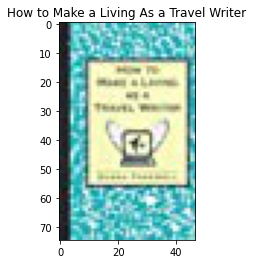

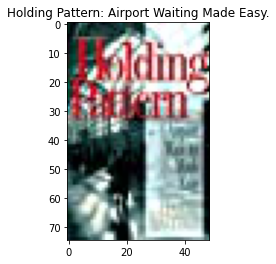

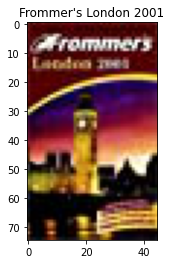

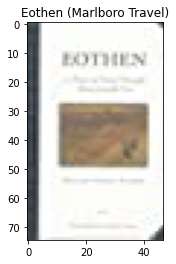

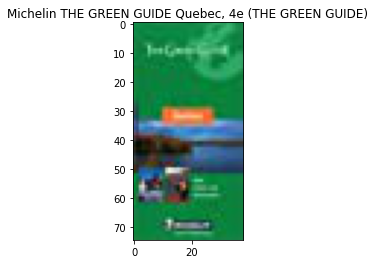

In [87]:
recommendations('Louisiana Dawn')

In [66]:
!pip install gensim

In [68]:
google_model.save('/content/gdrive/MyDrive/book recom/contentmodel.model')

In [ ]:
model = Word2Vec.load('w2vModel.model')

In [70]:
import pickle

In [72]:
with open("/content/gdrive/MyDrive/book recom/word2vec_embeddings.txt", "wb") as fp:   #Pickling
...   pickle.dump(tfidf_vectors, fp)

In [74]:
with open("/content/gdrive/MyDrive/book recom/word2vec_embeddings.txt", "rb") as fp:   # Unpickling
...   tfidf_vectors= pickle.load(fp)

In [ ]:
#load books df- descriptions not needed
# load the tfidf vectors
#run the recommendations function- need to change the image part

In [90]:
testing=pd.read_csv('/content/gdrive/MyDrive/book recom/cleaned_desc_comb.csv')

In [91]:
test_set=testing.iloc[10:20]

In [98]:
test_set=test_set.to_dict(orient='records')

In [99]:
test_set

[{'author': 'Frances Mayes',
  'avgRating': 0.0,
  'categories': "['Language Arts & Disciplines']",
  'cleaned': 'author tuscan sun shares passion poetry intriguing handbook takes readers inside art reading writing poems discussing basic terminology writing techniques range texture sound rhyme repetition accompanied thought provoking selection poems demonstrate art poetry original 25 000 first printing',
  'description': 'The author of Under the Tuscan Sun shares her passion for poetry in an intriguing handbook that takes readers inside the art of reading and writing poems, discussing basic terminology and writing techniques that range from texture and sound to rhyme and repetition, accompanied by a thought-provoking selection of poems that demonstrate the art of poetry. Original. 25,000 first printing.',
  'isbn': 156007622,
  'large_img': 'http://images.amazon.com/images/P/0156007622.01.LZZZZZZZ.jpg',
  'medium_img': 'http://images.amazon.com/images/P/0156007622.01.MZZZZZZZ.jpg',
  '

In [100]:
res_dict={}

In [101]:
res_dict["recommendations"]=test_set

In [102]:
res_dict

{'recommendations': [{'author': 'Frances Mayes',
   'avgRating': 0.0,
   'categories': "['Language Arts & Disciplines']",
   'cleaned': 'author tuscan sun shares passion poetry intriguing handbook takes readers inside art reading writing poems discussing basic terminology writing techniques range texture sound rhyme repetition accompanied thought provoking selection poems demonstrate art poetry original 25 000 first printing',
   'description': 'The author of Under the Tuscan Sun shares her passion for poetry in an intriguing handbook that takes readers inside the art of reading and writing poems, discussing basic terminology and writing techniques that range from texture and sound to rhyme and repetition, accompanied by a thought-provoking selection of poems that demonstrate the art of poetry. Original. 25,000 first printing.',
   'isbn': 156007622,
   'large_img': 'http://images.amazon.com/images/P/0156007622.01.LZZZZZZZ.jpg',
   'medium_img': 'http://images.amazon.com/images/P/01560